Import of modules 

In [75]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

Step 1: set up initial value x0, N, s (positive real number)

In [39]:
x_0 = 1
n = 10000
s = 1

Programm probability density function

In [41]:
def probability_density_function(x):
    return 1/2*np.exp(-abs(x))

Step 2: Create Random Walk Algorith

In [43]:
x_values = [x_0]

In [49]:
for i in range(1,1000):
    x_star = np.random.normal(x_values[i-1], s)
    r = probability_density_function(x_star)/probability_density_function(x_values[i-1])
    u = random.uniform(0, 1)
    if math.log(u) < math.log(r):
        x_values.append(x_star)
    else:
        x_values.append(x_values[i-1])

In [83]:
n/10

1000.0

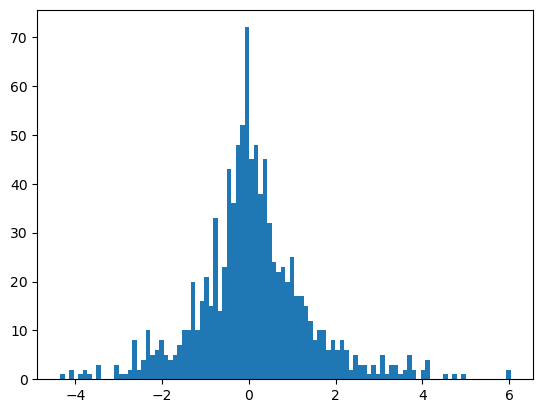

In [87]:
plt.hist(x_values, bins=int(n/100))
plt.show()

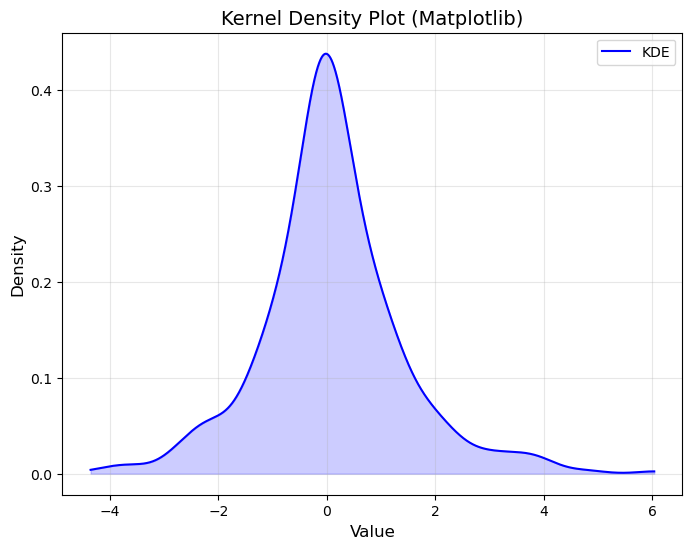

In [77]:
kde = gaussian_kde(x_values)
x_range = np.linspace(min(x_values), max(x_values), n)  # Generate x values for the plot
density = kde(x_range)  # Compute the density values

plt.figure(figsize=(8, 6))
plt.plot(x_range, density, color="blue", label="KDE")
plt.fill_between(x_range, density, color="blue", alpha=0.2)
plt.title("Kernel Density Plot (Matplotlib)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

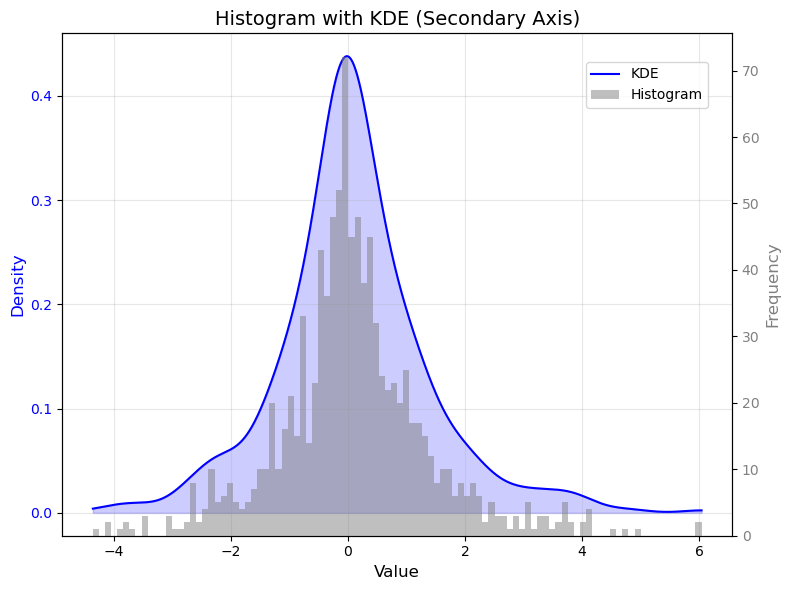

In [91]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the KDE on the primary axis
ax1.plot(x_range, density, color="blue", label="KDE")
ax1.fill_between(x_range, density, color="blue", alpha=0.2)
ax1.set_xlabel("Value", fontsize=12)
ax1.set_ylabel("Density", color="blue", fontsize=12)
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(alpha=0.3)

# Create the secondary axis for the histogram
ax2 = ax1.twinx()
ax2.hist(x_values, bins=int(n / 100), alpha=0.5, color="gray", label="Histogram")
ax2.set_ylabel("Frequency", color="gray", fontsize=12)
ax2.tick_params(axis='y', labelcolor="gray")

# Add legends
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))

# Add a title
plt.title("Histogram with KDE (Secondary Axis)", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()